In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import re
import string 
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stop = stopwords.words('english') 
from wordcloud import WordCloud, STOPWORDS 

In [8]:
cols = ['label','id','date','query','user','tweet']
df = pd.read_csv("C:/Users/nives/OneDrive/Desktop/HybridSA/datasets/sentiment140.csv",encoding="ISO-8859-1",header=None, names=cols)
df.head()

,label,id,date,query,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


<Axes: xlabel='label'>

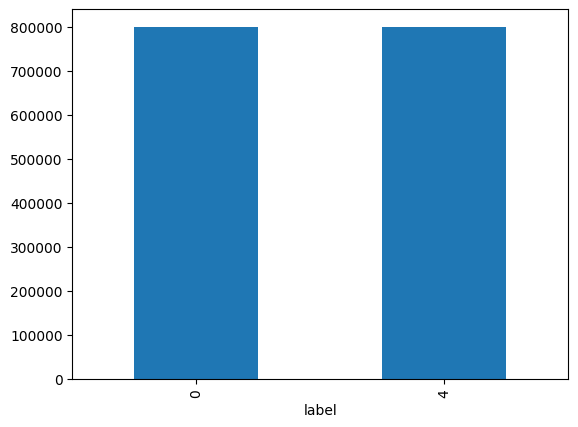

In [9]:
df['label'].value_counts().plot.bar()

In [10]:
df.drop(['id','date', 'query','user'],axis=1,inplace=True)
df.head()

,label,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [11]:
df["tweet"] = df["tweet"].str.lower()

In [12]:
regex = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+" #regex seen from internet 
def preprocess(text):
    # Remove link,user and special characters
    text = re.sub(regex, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
      tokens.append(token)
    return " ".join(tokens)
df['tweet'] = df['tweet'].apply(preprocess)

In [13]:
df.head()

,label,tweet
0,0,awww that s a bummer you shoulda got david car...
1,0,is upset that he can t update his facebook by ...
2,0,i dived many times for the ball managed to sav...
3,0,my whole body feels itchy and like its on fire
4,0,no it s not behaving at all i m mad why am i h...


In [14]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
df["tweet"] = df["tweet"].apply(remove_punctuations)

In [15]:
def check_weird_symbols(text):
  printable = string.printable
  symbols = []
  for lines in text:
    for chars in lines:
      if chars not in printable:
        symbols.append(chars)
  return list(set(symbols))
stop.append("user")

In [16]:
#removing stop words
df['tweet'] = df['tweet'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))

In [17]:
porter = PorterStemmer()
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [porter.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)
#stemming
df['tweet'] = df['tweet'].apply(stem_sentences)

In [18]:
#checking for NA values in data
df.isna().sum().sum() #if there is even a single missing value it should be a number other than zero

0

<Axes: xlabel='label'>

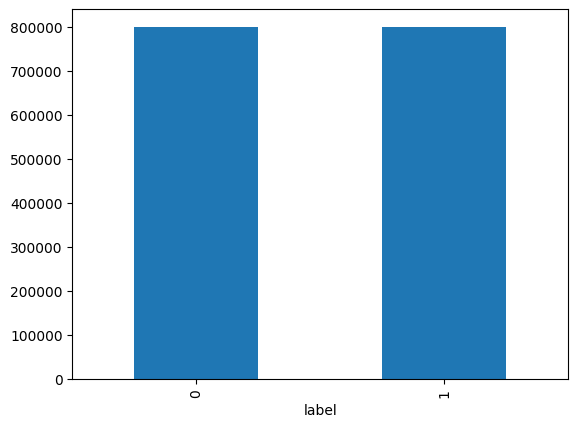

In [19]:
df['label'] = df['label'].apply(lambda x: 1 if x==4 else 0 )
df['label'].value_counts().plot.bar()

In [20]:
df['tweet'] = df['tweet'].apply(preprocess)

In [21]:
df[df['label'] == 0].head(10)

,label,tweet
0,0,awww bummer shoulda got david carr third day
1,0,upset updat facebook text might cri result sch...
2,0,dive mani time ball manag save 50 rest go bound
3,0,whole bodi feel itchi like fire
4,0,behav mad see
5,0,whole crew
6,0,need hug
7,0,hey long time see ye rain bit bit lol fine thank
8,0,nope
9,0,que muera


In [22]:
df[df['label'] == 1].head(10)

,label,tweet
800000,1,love health4uandpet u guy r best
800001,1,im meet one besti tonight cant wait girl talk
800002,1,thank twitter add sunisa got meet hin show dc ...
800003,1,sick realli cheap hurt much eat real food plu ...
800004,1,effect everyon
800005,1,tell burst laugh realli loud thank make come sulk
800006,1,than respons ihad alreadi find answer
800007,1,jealou hope great time vega like acm love show
800008,1,ah congrat mr fletcher final join twitter
800009,1,respond stupid cat help type forgiv error


In [23]:
wc_tweets = df["tweet"]

In [24]:
#Code taken from WordCloud library site
comment_words = ' '
stopwords = set(STOPWORDS) 
for val in wc_tweets: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
      comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

KeyboardInterrupt: 

In [25]:
df.rename(columns={'label': 'labels'}, inplace=True)
df.columns

Index(['labels', 'tweet'], dtype='object')

In [26]:
import os
folder_path = 'C:/Users/nives/OneDrive/Desktop/HybridSA/cleaned_data'
os.makedirs(folder_path, exist_ok=True)
df.to_csv(os.path.join(folder_path, 'preprocessed_sentiment140.csv'), index=False)